                    Robust linear Model Regression Results                    
Dep. Variable:                      Y   No. Observations:                  100
Model:                            RLM   Df Residuals:                       98
Method:                          IRLS   Df Model:                            1
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Tue, 03 Oct 2023                                         
Time:                        00:09:02                                         
No. Iterations:                    19                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0617      0.041     26.183      0.0

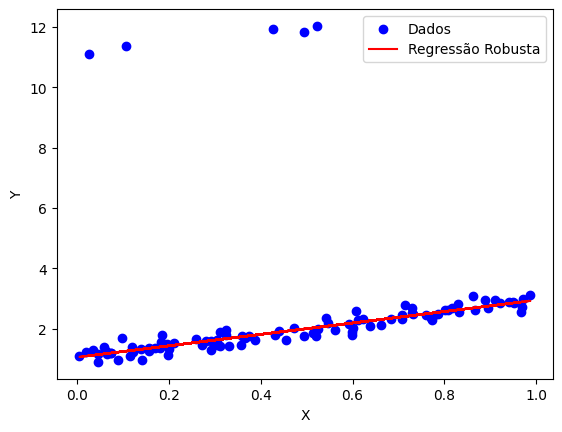

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

dados = pd.read_parquet("dados_robustos.parquet")
X = dados.X
Y = dados.Y

# Ajustar o modelo de regressão robusta usando statsmodels
X_const = sm.add_constant(X)  # Adicionar constante à matriz X
#model = sm.OLS(Y, X_const)  # Usar estimador OLS
model = sm.RLM(Y, X_const, M=sm.robust.norms.HuberT())  # Usar o estimador de Huber
results = model.fit()

# Imprimir os resultados da regressão robusta
print(results.summary())

# Plotar os dados e a linha de regressão
plt.scatter(X, Y, label='Dados', color='blue')
plt.plot(X, results.predict(X_const), label='Regressão Robusta', color='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

# **Exercicio Regressão Robusta**

**Análise de Preços Imobiliários com Regressão Robusta**

* Objetivo:

Realizar uma análise de preços imobiliários em uma cidade, considerando a presença de outliers e dados incomuns, usando a regressão robusta para modelar o relacionamento entre as características das propriedades e seus preços.

* Dados:

Você tem um conjunto de dados que contém informações sobre propriedades imobiliárias na cidade, incluindo características como tamanho da área, número de quartos, localização e idade da construção, além do preço de venda de cada propriedade. Os dados estão presentes em "dados_imobiliarios.parquet".

In [ ]:
dados_imobiliarios = pd.read_parquet("dados_imobiliarios.parquet")

X = dados_imobiliarios.drop(["Preco"], axis = 1)
Y = dados_imobiliarios.Preco

X_const = sm.add_constant(X)
model = sm.RLM(Y, X_const, M=sm.robust.norms.HuberT()).fit()
# model = sm.OLS(Y, X_const).fit()

print(model.summary())



                    Robust linear Model Regression Results                    
Dep. Variable:                  Preco   No. Observations:                  300
Model:                            RLM   Df Residuals:                      296
Method:                          IRLS   Df Model:                            3
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Tue, 03 Oct 2023                                         
Time:                        00:46:35                                         
No. Iterations:                     8                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.271e+04   3304.954      3.847      0.0